In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
train = pd.read_csv("256/train.csv")

In [2]:
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [3]:
sincerequestions=train[:][train['target']==0]
insincerequestions=train[:][train['target']==1]

In [4]:
print("Sincere questions:",len(sincerequestions))
print("Insincere questions:",len(insincerequestions))

Sincere questions: 1225312
Insincere questions: 80810


UNDERSAMPLING TO HANDLE UNBALANCED DATA

In [5]:
from imblearn.under_sampling import RandomUnderSampler
sincerequestions_under=sincerequestions.sample(len(insincerequestions))

In [6]:
train_under = pd.concat([sincerequestions_under,insincerequestions], axis=0)

In [7]:
train_temp = train_under.drop(['target'],axis=1)

Preprocessing

In [8]:
#REMOVE PUNCTUATIONS
def clean_text(x):

    x = str(x)
    for punct in "/-":
        x = x.replace(punct, ' ')
    for punct in '&':
        x = x.replace(punct, f' {punct} ')
    for punct in '?!.,"#$%\'()*+-/:;<=>@[\\]^_`{|}~' + '“”’':
        x = x.replace(punct, '')
    return x

In [9]:
import re
#REMOVE NUMBERS
def clean_numbers(x):

    x = re.sub('[0-9]{5,}', '#####', x)
    x = re.sub('[0-9]{4}', '####', x)
    x = re.sub('[0-9]{3}', '###', x)
    x = re.sub('[0-9]{2}', '##', x)
    return x

In [10]:
#REMOVE MISPELLED WORDS
def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re

mispell_dict = {'colour':'color',
                'centre':'center',
                'didnt':'did not',
                'doesnt':'does not',
                'isnt':'is not',
                'shouldnt':'should not',
                'favourite':'favorite',
                'travelling':'traveling',
                'counselling':'counseling',
                'theatre':'theater',
                'cancelled':'canceled',
                'labour':'labor',
                'organisation':'organization',
                'wwii':'world war 2',
                'citicise':'criticize',
                'instagram': 'social medium',
                'whatsapp': 'social medium',
                'snapchat': 'social medium',"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

mispellings, mispellings_re = _get_mispell(mispell_dict)

def replace_typical_misspell(text):
    def replace(match):
        return mispellings[match.group(0)]

    return mispellings_re.sub(replace, text)

In [11]:
train_temp["question_text"] = train_temp["question_text"].apply(lambda x: clean_text(x))
train_temp["question_text"] = train_temp["question_text"].apply(lambda x: clean_numbers(x))
train_temp["question_text"] = train_temp["question_text"].apply(lambda x: replace_typical_misspell(x))


SPLITTING TRAIN AND TEST

In [12]:
from sklearn.model_selection import train_test_split
train_x, val_x,train_y,val_y = train_test_split(train_temp,train_under['target'],test_size=.20, random_state=0)

In [13]:
print(len(train_x))
print(len(val_x))

129296
32324


TFIDF VECTORIZER

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=100000, stop_words='english',ngram_range=(1,3))
X_train = vectorizer.fit_transform(train_x["question_text"])
X_val = vectorizer.transform(val_x["question_text"])

In [15]:
features=vectorizer.get_feature_names()
len(features)

1264987

LOGISTIC REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,train_y)
y_pred1=logr.predict(X_val)

/Users/ankit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


XG BOOST CLASSIFIER

In [16]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,train_y)
y_pred2 = xgb.predict(X_val)

BERNOULLI NAIVE BAYES CLASSIFIER

In [23]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=0.01)
bnb.fit(X_train,train_y)
y_pred3 = bnb.predict(X_val)

EVALUATION USING ACCURACY SCORE and F1 SCORE

In [54]:
from sklearn.metrics import f1_score, balanced_accuracy_score

In [55]:
def evaluate(model,y_predict):
    print(model)
    f1=f1_score(val_y,y_predict)
    accuracy= balanced_accuracy_score(val_y,y_predict)
    print("F1 score:",f1)
    print("Accuracy:",accuracy)
    return f1,accuracy
    

In [56]:
f1_logr,acc_logr=evaluate("LOGISTIC REGRESSION",y_pred1)

LOGISTIC REGRESSION
F1 score: 0.8745723058926744
Accuracy: 0.8669000032439603


In [57]:
f1_xgb,acc_xgb=evaluate("XGBOOST CLASSIFIER",y_pred2)

XGBOOST CLASSIFIER
F1 score: 0.7118743794358842
Accuracy: 0.7589469339048308


In [58]:
f1_bnb,acc_bnb=evaluate("BERNOULLI NAIVE BAYES",y_pred3)

BERNOULLI NAIVE BAYES
F1 score: 0.8307089186540346
Accuracy: 0.8401706755764279


EVALUATION GRAPH

In [59]:
import matplotlib.pyplot as plt
import numpy as np

In [60]:
objects = ('LOGISTIC REGRESSION', 'XGBOOST CLASSIFIER', 'BERNOULLI NAIVE BAYES')
y_pos = np.arange(len(objects))
performance1 = [f1_logr,f1_xgb,f1_bnb]
performance2=[acc_logr,acc_xgb,acc_bnb]

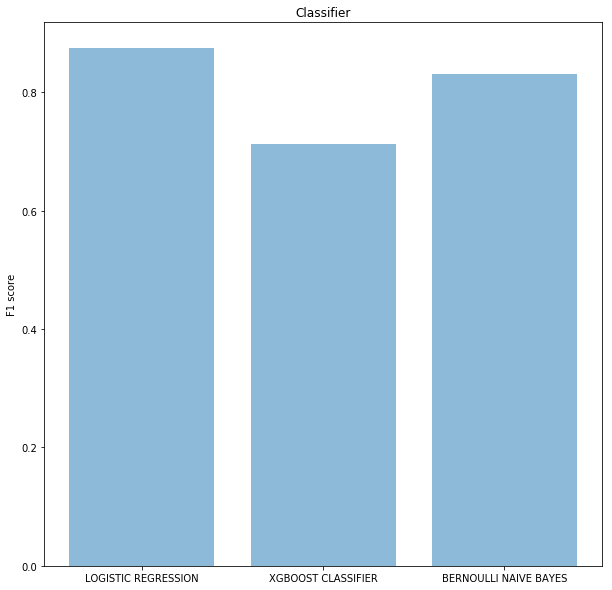

In [61]:
plt.figure(figsize = (10,10))
plt.bar(y_pos, performance1, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 score')
plt.title('Classifier')

plt.show()

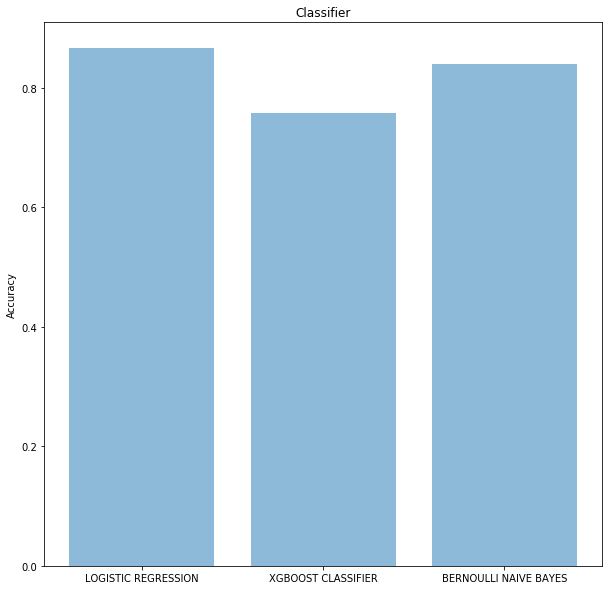

In [62]:
plt.figure(figsize = (10,10))
plt.bar(y_pos, performance2, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Classifier')

plt.show()